In [1]:
# Initialize OK
from client.api.notebook import Notebook
ok = Notebook('lab13.ok')

Assignment: lab13
OK, version v1.13.11



# Lab 13: Scraping and Parsing Data 

In this lab, you will get exposure to some basic tools for manipulating hierarchical data structures pulled from the web.

### Due Date 
This assignment is due on **Monday, November 18 at 11:59pm**.

### Collaboration Policy
Data science is a collaborative activity. While you may talk with others about this assignment, we ask that you **write your solutions individually**. If you discuss the assignment with others, please **include their names** in the cell below.

In [2]:
# Run this cell to set up your notebook
import requests
from lxml import html
from lxml import etree
import numpy as np

from bs4 import BeautifulSoup

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

## Question 1

In this question we work with a string containing mock XML data to get practice with writing XPath expressions. Note that it is similar to the file used in class, but the tag names are capitalized (and XML is case sensitive).

In [3]:
# string containing XML data
plantData = '''
<CATALOG YEAR="2017">
    <PLANT>
        <COMMON>Bloodroot</COMMON>
        <BOTANICAL>Sanguinaria canadensis</BOTANICAL>
        <ZONE>4</ZONE>
        <LIGHT>Mostly Shady</LIGHT>
        <PRICE CURRENCY="USD">2.44</PRICE>
        <AVAILABILITY>031599</AVAILABILITY>
    </PLANT>
    <PLANT>
        <COMMON>Columbine</COMMON>
        <BOTANICAL>Aquilegia canadensis</BOTANICAL>
        <ZONE>3</ZONE>
        <LIGHT>Mostly Shady</LIGHT>
        <PRICE CURRENCY="USD">9.37</PRICE>
        <AVAILABILITY>030699</AVAILABILITY>
    </PLANT>
    <PLANT>
        <COMMON>Goatsbeard</COMMON>
        <BOTANICAL>Tragopogon porrifolius</BOTANICAL>
        <ZONE>4</ZONE>
        <LIGHT>Full Shade</LIGHT>
        <PRICE CURRENCY="euro">6.31</PRICE>
        <AVAILABILITY>080399</AVAILABILITY>
    </PLANT>
</CATALOG>'''

# parse the data into an ElementTree
root = etree.fromstring(plantData)

# find the common name of the plants in zone 4
commonName = root.xpath("./PLANT[ZONE/text() ='4']/COMMON/text()")
commonName

['Bloodroot', 'Goatsbeard']

### Question 1a

Write an XPath expression to find the botanical names of every plant in the catalog.

<!--
BEGIN QUESTION
name: q1a
-->

In [4]:
botanicalNames = root.xpath('//PLANT/BOTANICAL/text()')
botanicalNames

['Sanguinaria canadensis', 'Aquilegia canadensis', 'Tragopogon porrifolius']

In [5]:
ok.grade("q1a");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



### Question 1b

Write an XPath expression to find the common names of all plants that prefer mostly shady light.

<!--
BEGIN QUESTION
name: q1b
-->

In [6]:
commonNameShady = root.xpath('//PLANT[LIGHT/text()="Mostly Shady"]/COMMON/text()')
commonNameShady

['Bloodroot', 'Columbine']

In [7]:
ok.grade("q1b");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



### Question 1c

Find the price of every plant that has its price listed in US dollars.

<!--
BEGIN QUESTION
name: q1c
-->

In [8]:
price = root.xpath('//PLANT[PRICE[@CURRENCY="USD"]]/PRICE/text()')
price

['2.44', '9.37']

In [9]:
ok.grade("q1c");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



## Question 2

Below we collect information about the top grossing movies from the Wikipedia page: [List of highest-grossing films](https://en.wikipedia.org/wiki/List_of_highest-grossing_films). 

 
We begin by making an HTTP request using the `requests` library to retrieve the page contents, and then we use Beautiful Soup to parse this HTML content into a tree. 

In [10]:
url = 'https://en.wikipedia.org/wiki/List_of_highest-grossing_films'
res = requests.get(url)
soup = BeautifulSoup(res.content, "html.parser")

Visit the page in a browser and look for the table with title "High-grossing films by year of release".  We want to extract the gross and the budget for each of these films. 

### Question 2a

Use `find_all` in Beautiful Soup to locate all table nodes in the content.

<!--
BEGIN QUESTION
name: q2a
-->

In [11]:
tabs = soup.find_all('table')

In [12]:
ok.grade("q2a");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
q2a > Suite 1 > Case 1

>>> len(tabs)
92

# Error: expected
#     95
# but got
#     92

Run only this test case with "python3 ok -q q2a --suite 1 --case 1"
---------------------------------------------------------------------
Test summary
    Passed: 0
    Failed: 1
[k..........] 0.0% passed



### Question 2b

We found nearly 100 tables! We will have to use another approach to find the table that we are interested in. 

Return to the web page and view the source. Search in the raw HTML for the table that we want. Notice that it has some features that uniquely identify it.  For example, 

+ it has an `a` node with an href attribute value of "/wiki/1915_in_film"
+ it has a caption with text content "High-grossing films by year of release"
+ it has an `a` node with a title attribute value of "1915 in film"

Use the identifying features to locate the table. Note that once you locate the `a` node, then you will need to reverse up the tree a few levels to the tbody or the table node.

<!--
BEGIN QUESTION
name: q2b
-->

In [13]:
tbody = soup.find('a', href = "/wiki/1915_in_film").parent.parent.parent

In [14]:
ok.grade("q2b");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



### Question 2c

Locate all of the rows in the table and assign them to `rowSoup`. 
Then extract the information from the worldwide gross and budget `td` cells from each row.
Place these in `grossSoup` and `budgetSoup`, respectively.

<!--
BEGIN QUESTION
name: q2c
-->

In [15]:
rowSoup = tabs[2].find_all('tr')
budgetSoup = []
grossSoup = []
for r in rowSoup[1:]:
    tds = r.find_all('td')
    budgetSoup.append(tds[2].text)
    grossSoup.append(tds[1].text)

In [16]:
ok.grade("q2c");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



### Question 2d

Now that you have extracted these features from the table.
Put them in a DataFrame called `films`, clean them, and convert them to numeric fields. 

Notice that the amounts have $-signs and commas.
In addition some of the values have ranges, asterisks, letters.
To keep things simple, use regular expressions to eliminate all of the literals past the first amount. You will also need to eliminate the dollar signs and commas, too. 


**Hint**: you can use `pd.to_numeric()`

<!--
BEGIN QUESTION
name: q2d
-->

In [17]:
import re
budget = pd.Series(budgetSoup).str.replace(',', '')
budget = budget.str.extract(r'\$([\d]+)').rename(columns={0: "budget"})
gross= pd.Series(grossSoup).str.replace(',', '')
gross = gross.str.extract(r'\$([\d]+)').rename(columns={0: "gross"})
gross = pd.to_numeric(gross['gross'])
budget = pd.to_numeric(budget['budget'])

In [18]:
films = pd.concat([gross, budget], axis=1)
films.head(20)

,gross,budget
0,50000000,110000
1,1000000,489653
2,500000,300000
3,8000000,250000
4,3000000,120000
5,5000000,800000
6,5000000,600000
7,2500000,930042
8,5000000,800000
9,3000000,700000


In [19]:
ok.grade("q2d");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



### Question 2e

Make a scatter plot of gross against budget. Use log scale for both the x and y axes.

<!--
BEGIN QUESTION
name: q2e
-->

In [20]:
films['budget'] = np.log(films['budget'])
films['gross'] = np.log(films['gross'])

<Figure size 1296x432 with 0 Axes>

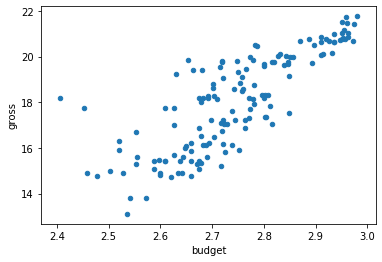

In [21]:
plt.figure(figsize=(18,6))
films['budget'] = np.log(films['budget'])
films.plot.scatter(x='budget', y='gross')

## Question 3

We will use the `lxml` module to read exchange rates (against the euro) from the European Central Bank and create a time series plot showing how the rates for three currencies–the British pound (GBP), the US dollar (USD), and the Canadian dollar (CAD)–have changed over time.

Before jumping to the code portion, visit this URL:
https://www.ecb.europa.eu/stats/eurofxref/eurofxref-daily.xml

This URL provides an example of the structure of the XML document with the exchange rates. Where do you see the currency and rate? What about the time? How deep is the tree?

The above link provides the daily conversion rates. Below we provide the `url` of the recorded history, over 4,800 days. Run the following code to send a request for the content at this url. 

In [22]:
url = 'https://www.ecb.europa.eu/stats/eurofxref/eurofxref-hist-90d.xml?d574942462c9e687c3235ce020466aae'
resECB = requests.get(url)

Let's check the status code of the request.

In [23]:
resECB.status_code

200

Now, let's examine the content of the response to see if it looks similar to the example from above. (We will just look at the first 1000 characters.)

In [24]:
resECB.content[:1000]

b'<?xml version="1.0" encoding="UTF-8"?><gesmes:Envelope xmlns:gesmes="http://www.gesmes.org/xml/2002-08-01" xmlns="http://www.ecb.int/vocabulary/2002-08-01/eurofxref"><gesmes:subject>Reference rates</gesmes:subject><gesmes:Sender><gesmes:name>European Central Bank</gesmes:name></gesmes:Sender><Cube><Cube time="2019-12-24"><Cube currency="USD" rate="1.108"/><Cube currency="JPY" rate="121.19"/><Cube currency="BGN" rate="1.9558"/><Cube currency="CZK" rate="25.485"/><Cube currency="DKK" rate="7.4712"/><Cube currency="GBP" rate="0.85533"/><Cube currency="HUF" rate="331.76"/><Cube currency="PLN" rate="4.2598"/><Cube currency="RON" rate="4.779"/><Cube currency="SEK" rate="10.4553"/><Cube currency="CHF" rate="1.0878"/><Cube currency="ISK" rate="135.6"/><Cube currency="NOK" rate="9.9118"/><Cube currency="HRK" rate="7.4455"/><Cube currency="RUB" rate="68.7932"/><Cube currency="TRY" rate="6.5994"/><Cube currency="AUD" rate="1.6019"/><Cube currency="BRL" rate="4.5246"/><Cube currency="CAD" rate="

### Question 3a

Use `etree.fromstring` to parse the content into a tree and assign it to `root`.

<!--
BEGIN QUESTION
name: q3a
-->

In [25]:
root = etree.fromstring(resECB.content)

In [26]:
ok.grade("q3a");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



### Question 3b

Notice that the `Envelope` tag comes has an attribute called `xmlns`. This refers to the *namespace*, an unique identifier for the element. The namespace in this case is a reference to `gesmes`, an international standard for the exchange of time series information. Here is how we specify the namespace of an element in XPath:

In [27]:
namespaceURI = 'http://www.ecb.int/vocabulary/2002-08-01/eurofxref'
rateGBP = root.xpath('.//x:Cube[@currency = "GBP"]/@rate', namespaces = {'x':namespaceURI})
rateGBP[:5]

['0.85533', '0.85708', '0.85133', '0.85073', '0.85055']

The result of `rateGBP` contains a list the daily exchange rates for British Pounds to Euros. Write an XPath query to get the list of dates. It should return a list of the same length as `rateGBP`.

<!--
BEGIN QUESTION
name: q3b
-->

In [28]:
date = root.xpath('.//x:Cube/@time', namespaces = {'x':namespaceURI}) # SOLUTION
date[:5]

['2019-12-24', '2019-12-23', '2019-12-20', '2019-12-19', '2019-12-18']

In [29]:
ok.grade("q3b");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



### Question 3c

In addition to the GBP, also extract the exchange rates for the USD and CAD.
Call these `rateUSD` and `rateCAD`, respectively.

<!--
BEGIN QUESTION
name: q3c
-->

In [30]:
rateUSD = root.xpath('.//x:Cube[@currency = "USD"]/@rate', namespaces = {'x':namespaceURI})
rateCAD = root.xpath('.//x:Cube[@currency = "CAD"]/@rate', namespaces = {'x':namespaceURI})

In [31]:
ok.grade("q3c");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



### Question 3d

Collect these three exchange rates and the dates (in the order `rateGBP`, `rateUSD`, `rateCAD`, and `date`) into a DataFrame called `exchange_rates` and convert them to appropriate data types for plotting.

<!--
BEGIN QUESTION
name: q3d
-->

In [32]:
exchange_rates = pd.DataFrame({'rateGBP':rateGBP, 'rateUSD':rateUSD, 'rateCAD':rateCAD,'date':date}) # SOLUTION

exchange_rates['date'] = pd.to_datetime(exchange_rates['date'], infer_datetime_format=True)
exchange_rates['rateGBP'] = exchange_rates['rateGBP'].astype(float)
exchange_rates['rateUSD'] = exchange_rates['rateUSD'].astype(float)
exchange_rates['rateCAD'] = exchange_rates['rateCAD'].astype(float)

exchange_rates.head()

,rateGBP,rateUSD,rateCAD,date
0,0.85533,1.1080,1.4582,2019-12-24
1,0.85708,1.1075,1.4577,2019-12-23
2,0.85133,1.1097,1.4579,2019-12-20
3,0.85073,1.1117,1.4588,2019-12-19
4,0.85055,1.1115,1.4624,2019-12-18


In [33]:
ok.grade("q3d");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



### Question 3e

Plot the exchange rate for three currencies---GBP, USD, and CAD---over time.

<!--
BEGIN QUESTION
name: q3e
-->

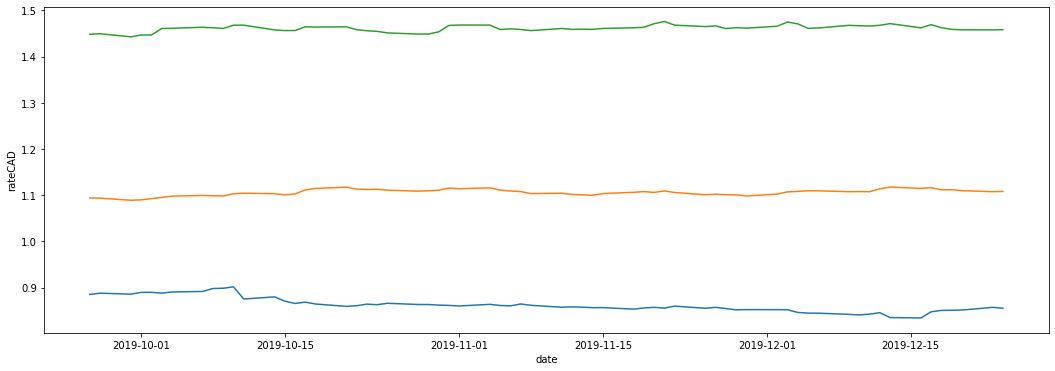

In [34]:
plt.figure(figsize=(18,6))
axs = sns.lineplot(y=exchange_rates['rateGBP'], x=exchange_rates['date'])
axs = sns.lineplot(y=exchange_rates['rateUSD'], x=exchange_rates['date'])
axs = sns.lineplot(y=exchange_rates['rateCAD'], x=exchange_rates['date'])

# Make sure to complete Vitamin 13 on Gradescope by 11:59 PM on Monday, 11/18!

# Submit
Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output.
**Please save before submitting!**

In [ ]:
# Save your notebook first, then run this cell to submit.
ok.submit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... 

ERROR  | auth.py:91 | {'error': 'invalid_grant'}


Saved 'lab13.ipynb'.
Performing authentication
Please enter your bCourses email.
